# Task 1 
## House Price Prediction
### Description: Develop a machine learning model for 
predicting house prices using Python 
scikit-learn, and TensorFlow.

In [1]:
# Import Required Libraries

# Data processing, CSV file reading
import pandas as pd

# Linear Algebra
import numpy as np

import os

In [2]:
for dirname, _, filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\data_description.txt
data\sample_submission.csv
data\test.csv
data\train.csv


In [3]:
# split data into train test dataset for predictions

from sklearn.model_selection import train_test_split

# Loading Training data and Test Data
train_data_file = "data/train.csv"
test_data_file = "data/test.csv"

X = pd.read_csv(train_data_file, index_col = "Id")
X_test = pd.read_csv(test_data_file, index_col = "Id")

X.dropna(axis = 0, subset=["SalePrice"], inplace=True)
y = X.SalePrice
X.drop(["SalePrice"], axis=1, inplace=True)

X.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
# Check Columns

low_cardinality_columns = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == "object"]
num_columns = [col for col in X.columns if X[col].dtype in ["int64", "float64"]]

required_columns = low_cardinality_columns + num_columns
high_cardinality_columns = [col for col in X.columns if col not in required_columns]

print(required_columns)
print("Dropped_columns: ",high_cardinality_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

In [5]:
# Define Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

In [6]:
numerical_transformer = SimpleImputer(strategy = "constant")

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant")),
    ("hot_hot_encoding", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, num_columns),
        ("categorical", categorical_transformer, low_cardinality_columns)
        
    ]
)

def get_scores(n_estimators, learning_rate):
    xgb_regressor_model = XGBRegressor(n_estimators=n_estimators,
                                      learning_rate=learning_rate,
                                      random_state=0,
                                      n_jobs=4)
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model_run",xgb_regressor_model)
    ])

    scores = -1*cross_val_score(model_pipeline, X, y, cv=3, scoring="neg_mean_absolute_error")
    
    return scores.mean()

In [9]:
# Training the model and finding the appropriate values

results = {}
for i in range(8, 13):
    for j in range(3):
        print("h")
        results[(100*i, 0.04 + 0.01*j)] = get_scores(100*i, 0.04+0.01*j)

h
h
h
h
h
h
h
h
h
h
h
h
h
h
h


{(800, 0.04): 16425.473914613674, (800, 0.05): 16656.193625131327, (800, 0.06): 16670.175500463836, (900, 0.04): 16424.832435735236, (900, 0.05): 16658.473173921127, (900, 0.06): 16672.036731467044, (1000, 0.04): 16420.35426840413, (1000, 0.05): 16657.485655061213, (1000, 0.06): 16673.914995747196, (1100, 0.04): 16419.583570317318, (1100, 0.05): 16660.211459643768, (1100, 0.06): 16675.35524702141, (1200, 0.04): 16421.347202197114, (1200, 0.05): 16663.42157286839, (1200, 0.06): 16675.483067277728}


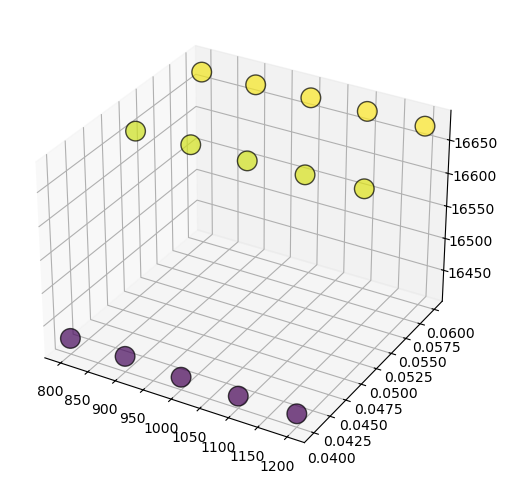

(1100, 0.04) 16419.583570317318


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

print(results)

x_axis = list(each[0] for each in results)
y_axis = list(each[1] for each in results)
error = list(results[each] for each in results)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x_axis, y_axis, error, linewidth = 1, alpha = 0.7, edgecolor = "k", s=200, c=error)
plt.show()

min_mae = math.inf
res = None
for each in results:
    if results[each]< min_mae:
        min_mae = results[each]
        res = each

print(res, min_mae)

In [12]:
pip install mpl_toolkits.clifford


  Obtaining dependency information for mpl_toolkits.clifford from https://files.pythonhosted.org/packages/8e/97/f7b8e864ff1ec8d0f0766722ad4ea71e513982414300c0fece2d10c47e3c/mpl_toolkits.clifford-0.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for clifford from https://files.pythonhosted.org/packages/70/30/3ba2d8485c5db27d818d65f33814c8b2374ed54b68618ca811c3c392b00d/clifford-1.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for trimesh from https://files.pythonhosted.org/packages/b4/ed/7a20addfb4df2b1085a35ca36f23e12b1447932d0f394b0f1e6f53722ab6/trimesh-4.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for sparse from https://files.pythonhosted.org/packages/07/a3/22e031f6833d84edd54b0809087d910907358bddc1c92e56b7b2db30f5ed/sparse-0.15.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/159.3 kB ? eta -:--:--
   ------- -------------------------------- 30.7/159.3 kB ? eta -:--:--
   -------------------------

In [17]:
# Thus the minimum error is n_estimators = 900 and learning_rate = 0.04
# Setting up final model using the required params

import pickle

xgb_regressor_model = XGBRegressor(n_estimators=res[0],
                                  learning_rate=res[1],
                                  random_state=0,
                                  n_jobs=4)

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model_run", xgb_regressor_model)
])

# Fitting the input and predicting the results
model_pipeline.fit(X, y)

# Saving the model to load it quickly in case we want to reuse it.
pickle.dump(model_pipeline, open("housing_price_model.pkl", "wb"))

# In case you want to predict without training the model again
# model_pipeline - pickle.load(open("housing_price_model.pkl", "rb"))

# Model Prediction
preds = model_pipeline.predict(X_test)

In [19]:
# Saving Output

output = pd.DataFrame({"Id": X_test.index, "SalePrice":preds})
output.to_csv("submission.csv",index=True)

In [20]:
output.head()

,Id,SalePrice
0,1461,127954.460938
1,1462,159532.640625
2,1463,188332.421875
3,1464,191976.843750
4,1465,187503.718750
